주가 모듈 사용해서 국내 항공사 2021년~2022년 주가 정보 불러오기

In [40]:
from pykrx import stock
import pandas as pd
import FinanceDataReader as fdr

#제주항공 2019년~2021년 주가 정보

JA = stock.get_market_ohlcv("20210104","20221230", "089590" )
data = JA[['종가']]
data.loc["2021-01-04"]

JA.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-01-04,15431,15515,15095,15306,327823,-0.545809
2021-01-05,15264,15557,15053,15348,346505,0.274402
2021-01-06,15348,15515,15180,15264,283465,-0.547303
2021-01-07,15180,15473,15095,15390,402239,0.825472
2021-01-08,15557,15599,15095,15390,347211,0.000000


In [37]:
#아시아나 2019년~2021년 주가 정보

AA = stock.get_market_ohlcv("20210104","20221230", "020560" )
data = AA[['종가']]
data.loc["2021-01-04"]

AA.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-01-04,0,0,0,20093,0,0.0
2021-01-05,0,0,0,20093,0,0.0
2021-01-06,0,0,0,20093,0,0.0
2021-01-07,0,0,0,20093,0,0.0
2021-01-08,0,0,0,20093,0,0.0


In [44]:
#대한항공 2019년~2021년 주가 정보

KA = stock.get_market_ohlcv("20210104","20221230", "003490" )
data = KA[['종가']]
data.loc["2021-01-04"]

KA.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-01-04,21284,22021,21013,21440,4355156,1.654734
2021-01-05,21400,22098,21013,21982,4013283,2.527985
2021-01-06,21749,22292,21555,21905,4377141,-0.350287
2021-01-07,22021,22176,21711,21866,2909181,-0.178042
2021-01-08,21866,21866,21323,21633,3624498,-1.065581


In [45]:
#진에어 2019년~2021년 주가 정보

JIN = stock.get_market_ohlcv("20210104","20221230", "272450" )
data = JIN[['종가']]
data.loc["2021-01-04"]

JIN.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-01-04,13036,13326,12795,13326,447937,2.224609
2021-01-05,13229,14484,13181,13954,834689,4.712592
2021-01-06,14388,14774,14195,14726,771392,5.532464
2021-01-07,14726,16174,14678,16078,1066025,9.181040
2021-01-08,16174,16850,15354,15692,948479,-2.400796


주가 정보 사용해서 일자별 종가 시각화

In [41]:
# 제주 항공 주가 그래프

import plotly.express as px
import pandas as pd

fig = px.line(JA, x = JA.index, y = '종가' )
fig.update_layout(
    title= "제주항공",
    width=900,
    height=450,
    xaxis_title="Dates",
    yaxis_title="EOD Price")    
fig.show()

/home/yean/venv/eda_venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [42]:
# 아시아나 항공 주가 그래프

import plotly.express as px
import pandas as pd

fig = px.line(AA, x = AA.index, y = '종가' )
fig.update_layout(
    title= "아시아나 항공",
    width=900,
    height=450,
    xaxis_title="Dates",
    yaxis_title="EOD Price")    
fig.show()

/home/yean/venv/eda_venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [46]:
# 대한 항공 주가 그래프

import plotly.express as px
import pandas as pd

fig = px.line(KA, x = KA.index, y = '종가' )
fig.update_layout(
    title= "대한 항공",
    width=900,
    height=450,
    xaxis_title="Dates",
    yaxis_title="EOD Price")    
fig.show()

/home/yean/venv/eda_venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [47]:
# 진에어 주가 그래프

import plotly.express as px
import pandas as pd

fig = px.line(JIN, x = JIN.index, y = '종가' )
fig.update_layout(
    title= "진에어",
    width=900,
    height=450,
    xaxis_title="Dates",
    yaxis_title="EOD Price")    
fig.show()

/home/yean/venv/eda_venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



2021년~2022년 어떤 일이 있어서 주가가 떨어졌는지 파악 위해 키워드 사용하여 뉴스 크롤링

In [49]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from urllib.parse import quote_plus
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.font_manager as font_manager

def crawl_naver_news(keywords, start_date, end_date):
    news_data = []
    base_url = "https://search.naver.com/search.naver"
    date_format = "%Y.%m.%d"
    for keyword in tqdm(keywords, desc="키워드별 진행"):
        current_start_date = start_date
        total_days = (end_date - start_date).days + 1
        for _ in tqdm(range(total_days), desc=f"{keyword} 뉴스 크롤링"):
            params = {
                'where': 'news',
                'query': keyword,
                'sm': 'tab_opt',
                'sort': '0',
                'photo': '0',
                'field': '0',
                'reporter_article': '',
                'pd': '3',
                'ds': current_start_date.strftime(date_format),
                'de': current_start_date.strftime(date_format),
                'docid': '',
                'nso': 'so:r,p:from{}to{},a:all'.format(current_start_date.strftime("%Y%m%d"), current_start_date.strftime("%Y%m%d")),
                'start': 1,
            }
            response = requests.get(base_url, params=params)
            soup = BeautifulSoup(response.text, 'html.parser')
            news_items = soup.select('a.news_tit')
            for item in news_items:
                title = item.get('title')
                url = item.get('href')
                news_data.append({'keyword': keyword, 'title': title, 'url': url})
            time.sleep(3)
            current_start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동
    return pd.DataFrame(news_data)
keywords = ["한국", "항공사", "여행", "코로나", "LCC"]
start_date = pd.to_datetime("2021-01-04")
end_date = pd.to_datetime("2022-12-30")
df_news = crawl_naver_news(keywords, start_date, end_date)
print(df_news)

키워드별 진행:   0%|          | 0/5 [00:00<?, ?it/s]

키워드별 진행: 100%|██████████| 5/5 [3:16:02<00:00, 2352.50s/it]

     keyword                                       title  \
0         한국                UAE행 한국 유조선 이란 혁명수비대에 나포(종합)   
1         한국                     한국 유조선 나포된 걸프 해역은 어떤 곳?   
2         한국                   [속보]UAE행 한국 국적 유조선 이란에 나포   
3         한국           이란 "환경오염으로 한국 선박 나포...사법 절차 밟을 것"   
4         한국               호르무즈 해협서 이란에 한국 선박 나포…청해부대 급파   
...      ...                                         ...   
9984     LCC             5월 국제선 ‘본궤도’라는데...제주 하늘길 “막막하네”   
9985     LCC  [CEO포커스] 정홍근 티웨이항공 사장, 적극적인 중장거리노선 승부수 통할까   
9986     LCC            되살아나는 항공업계, 전세기 예약 수요 폭발…적자 탈출은?   
9987     LCC           5월부터 해외여행 본궤도⋯국제선 항공편, 주 520회로 증가   
9988     LCC            “‘끝’ 보이는 코로나19… 항공업계, 이제 ‘시작’이죠”   

                                                    url  
0          http://yna.kr/AKR20210104167100108?did=1195m  
1     http://news.heraldcorp.com/view.php?ud=2021010...  
2     http://news.kmib.co.kr/article/view.asp?arcid=...  
3     https://www.ytn.co.kr/_ln/0104_2021010423

In [50]:
# 데이터프레임을 CSV 파일로 저장
df_news.to_csv('../data/2020_naver_news.csv', index=False, encoding='utf-8-sig')

In [51]:
# CSV 파일 불러오기
df = pd.read_csv('../data/2020_naver_news.csv', encoding='utf-8-sig')
df

,keyword,title,url
0,한국,UAE행 한국 유조선 이란 혁명수비대에 나포(종합),http://yna.kr/AKR20210104167100108?did=1195m
1,한국,한국 유조선 나포된 걸프 해역은 어떤 곳?,http://news.heraldcorp.com/view.php?ud=2021010...
2,한국,[속보]UAE행 한국 국적 유조선 이란에 나포,http://news.kmib.co.kr/article/view.asp?arcid=...
3,한국,"이란 ""환경오염으로 한국 선박 나포...사법 절차 밟을 것""",https://www.ytn.co.kr/_ln/0104_202101042333435608
4,한국,호르무즈 해협서 이란에 한국 선박 나포…청해부대 급파,https://www.nocutnews.co.kr/news/5475556
...,...,...,...
9984,LCC,5월 국제선 ‘본궤도’라는데...제주 하늘길 “막막하네”,http://www.jibs.co.kr/news/articles/articlesDe...
9985,LCC,"[CEO포커스] 정홍근 티웨이항공 사장, 적극적인 중장거리노선 승부수 통할까",http://moneys.mt.co.kr/news/mwView.php?no=2022...
9986,LCC,"되살아나는 항공업계, 전세기 예약 수요 폭발…적자 탈출은?",http://www.mediapen.com/news/view/720471
9987,LCC,"5월부터 해외여행 본궤도⋯국제선 항공편, 주 520회로 증가",https://www.asiatime.co.kr/article/20220429500349


찾아 본 뉴스 정보 워드 클라우드로 시각화

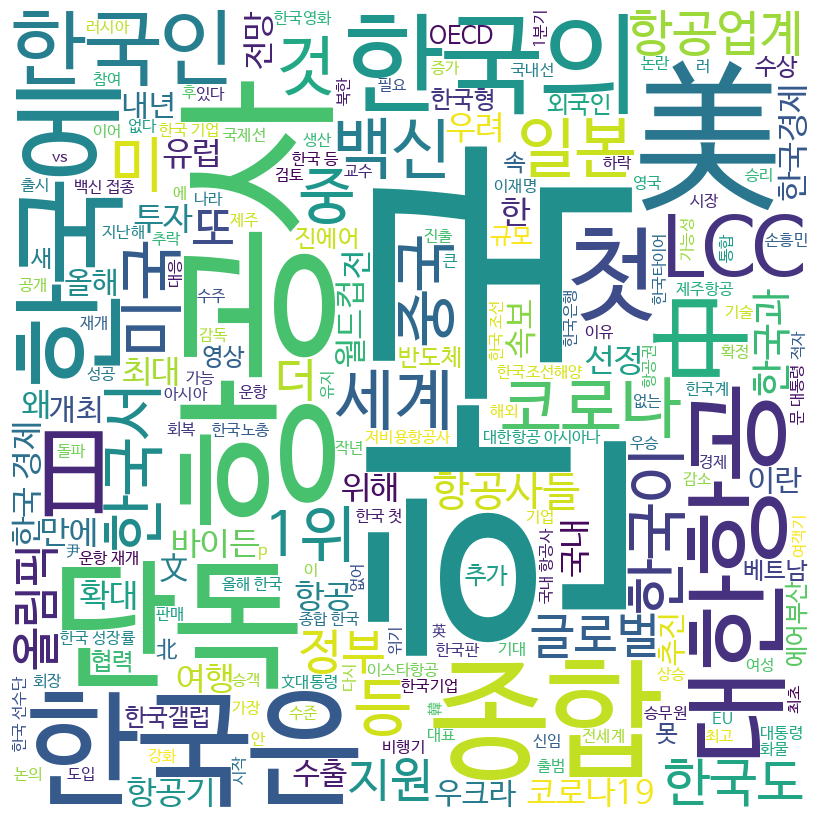

In [53]:
# CSV 파일 읽기
df = pd.read_csv('../data/2020_naver_news.csv', encoding='utf-8-sig')

# 워드 클라우드를 생성할 열 선택
text = ' '.join(df['title'].dropna())  # 'your_column'을 실제 열 이름으로 변경하세요.

# 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"  # 사용하고자 하는 한글 폰트 경로로 변경하세요.
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드 클라우드 생성
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, font_path=font_path).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()